In [ ]:
import pandas as pd
df = pd.read_csv('hair_loss.csv')
print(df.head())


   total_protein  total_keratine  hair_texture  vitamin  manganese  iron  \
0            312             100            14      249         87    55   
1             52             207             3      425        387     1   
2            170             197            11      140        199    91   
3            256             334            19      358        120     3   
4            309             185            58      207        329   301   

   calcium  body_water_content  stress_level  liver_data  hair_fall  
0      333                  44            41         368          4  
1      182                  26            65          41          1  
2      414                  30            54          90          4  
3       35                  48            45          65          2  
4      345                  23            90         346          4  


In [ ]:
print(df.isnull().sum())


total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64


In [ ]:
print(df.describe())


       total_protein  total_keratine   hair_texture        vitamin  \
count  100000.000000   100000.000000  100000.000000  100000.000000   
mean      249.573960      248.875470      49.558400     249.949730   
std       144.427199      144.193226      28.913959     144.240639   
min         0.000000        0.000000       0.000000       0.000000   
25%       125.000000      124.000000      25.000000     125.000000   
50%       250.000000      249.000000      50.000000     250.000000   
75%       375.000000      373.000000      75.000000     375.000000   
max       499.000000      499.000000      99.000000     499.000000   

           manganese           iron        calcium  body_water_content  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean      249.558480     249.099260     250.538160           49.484590   
std       144.283595     144.341273     144.467648           28.863998   
min         0.000000       0.000000       0.000000            0.000000   

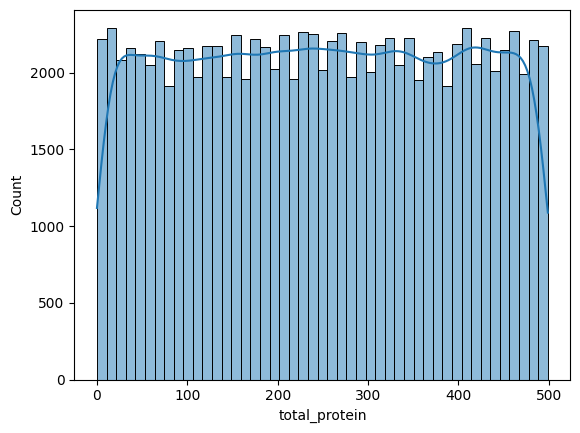

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['total_protein'], kde=True)
plt.show()


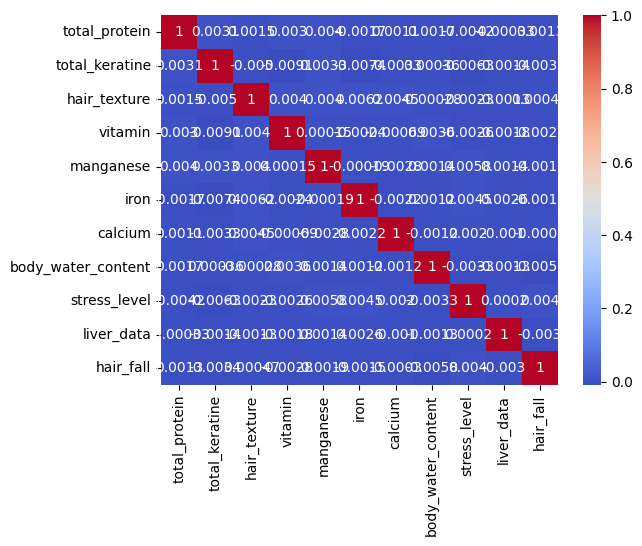

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df = df.dropna()  # or use imputation techniques


In [ ]:
df = pd.get_dummies(df, columns=['hair_texture'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop('hair_fall', axis=1)
features_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['hair_fall'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Random Forest trained.
Gradient Boosting trained.
SVM trained.
Logistic Regression trained.
KNN trained.
Decision Tree trained.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"==== {name} ====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


==== Random Forest ====
Accuracy: 0.16885
              precision    recall  f1-score   support

           0       0.18      0.20      0.19      3348
           1       0.17      0.17      0.17      3317
           2       0.17      0.19      0.18      3296
           3       0.16      0.15      0.16      3328
           4       0.17      0.15      0.16      3345
           5       0.16      0.15      0.16      3366

    accuracy                           0.17     20000
   macro avg       0.17      0.17      0.17     20000
weighted avg       0.17      0.17      0.17     20000

Confusion Matrix:
 [[662 530 583 508 525 540]
 [621 580 607 505 490 514]
 [599 568 622 539 466 502]
 [604 599 602 500 474 549]
 [591 585 623 526 504 516]
 [628 612 622 502 493 509]]
==== Gradient Boosting ====
Accuracy: 0.1659
              precision    recall  f1-score   support

           0       0.15      0.16      0.16      3348
           1       0.17      0.14      0.15      3317
           2       0.17  

In [ ]:
!pip install autogluon
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(label="hair_fall").fit(df)
predictor.leaderboard()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

No path specified. Models will be saved in: "AutogluonModels/ag-20250518_135543"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.93 GB / 12.67 GB (78.3%)
Disk Space Avail:   65.47 GB / 107.72 GB (60.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.1796,accuracy,0.014521,9.903563,0.001462,0.272600,2,True,14
1,LightGBMLarge,0.1792,accuracy,0.007389,3.778190,0.007389,3.778190,1,True,13
2,NeuralNetTorch,0.1776,accuracy,0.029135,174.636451,0.029135,174.636451,1,True,12
3,NeuralNetFastAI,0.1772,accuracy,0.069558,111.331566,0.069558,111.331566,1,True,3
4,XGBoost,0.1768,accuracy,0.009079,5.051856,0.009079,5.051856,1,True,11
5,LightGBMXT,0.1768,accuracy,0.022741,8.021469,0.022741,8.021469,1,True,4
6,ExtraTreesGini,0.1756,accuracy,0.472961,127.902486,0.472961,127.902486,1,True,9
7,CatBoost,0.1752,accuracy,0.005671,5.852773,0.005671,5.852773,1,True,8
8,LightGBM,0.1720,accuracy,0.006273,3.031837,0.006273,3.031837,1,True,5
9,KNeighborsDist,0.1632,accuracy,0.366185,0.225261,0.366185,0.225261,1,True,2


In [ ]:
X = df.drop(columns='hair_fall')
y = df['hair_fall']


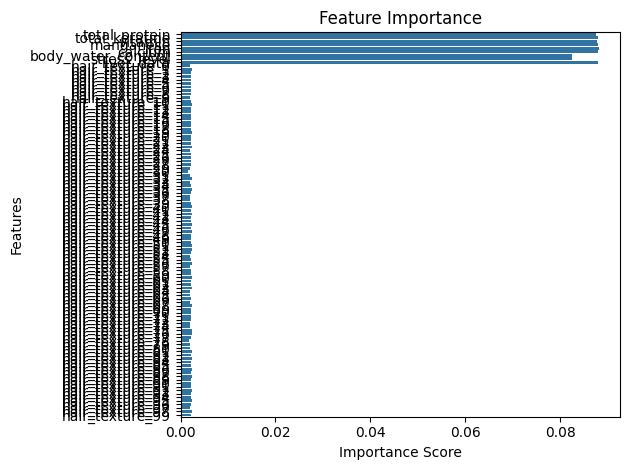

In [ ]:
# DO NOT do this:
# from re import X

# Correct feature importance plot:
import seaborn as sns
import matplotlib.pyplot as plt

importances = models["Random Forest"].feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


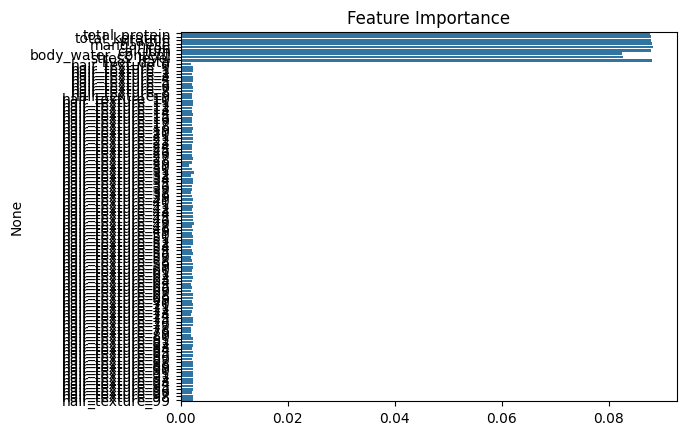

In [ ]:
importances = models["Random Forest"].feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()



In [ ]:
import joblib

joblib.dump(grid.best_estimator_, "hair_fall_model.pkl")
